Hierarchical Risk Parity is a machine learning form of portfolio optimization and is another approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

pypfopt.__version__

'1.4.2'

In [2]:
tickers = ["EEM", "EFA", "IJR", "SPY", "AGG", "JNK", "SHY"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  7 of 7 completed


,AGG,EEM,EFA,IJR,JNK,SHY,SPY
Date,,,,,,,
2021-08-10,115.430000,52.180000,80.449997,111.620003,108.650002,86.150002,442.679993
2021-08-11,115.540001,52.320000,81.000000,112.400002,108.830002,86.190002,443.779999
2021-08-12,115.550003,51.860001,80.930000,111.830002,108.970001,86.190002,445.109985
2021-08-13,115.970001,51.730000,81.419998,111.010002,109.160004,86.199997,445.920013
2021-08-16,116.029999,51.259998,81.000000,110.459999,109.190002,86.220001,446.970001


In [3]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AGG,EEM,EFA,IJR,JNK,SHY,SPY
Date,,,,,,,
2021-08-10,-0.001298,0.001343,0.002242,0.009679,-0.001746,-0.000348,0.001244
2021-08-11,0.000953,0.002683,0.006837,0.006988,0.001657,0.000464,0.002485
2021-08-12,0.000087,-0.008792,-0.000864,-0.005071,0.001286,0.000000,0.002997
2021-08-13,0.003635,-0.002507,0.006055,-0.007333,0.001744,0.000116,0.001820
2021-08-16,0.000517,-0.009086,-0.005158,-0.004955,0.000275,0.000232,0.002355


In [4]:
from pypfopt import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AGG', 0.07181),
             ('EEM', 0.00082),
             ('EFA', 0.00239),
             ('IJR', 0.00124),
             ('JNK', 0.00752),
             ('SHY', 0.91303),
             ('SPY', 0.00319)])

From a universe of assets, form a distance matrix based on the correlation of the assets.
Using this distance matrix, cluster the assets into a tree via hierarchical clustering
Within each branch of the tree, form the minimum variance portfolio.
Iterate over each level, optimally combining the mini-portfolios at each node.

(Taken from the cookbook here as a summary of the HRP steps above)

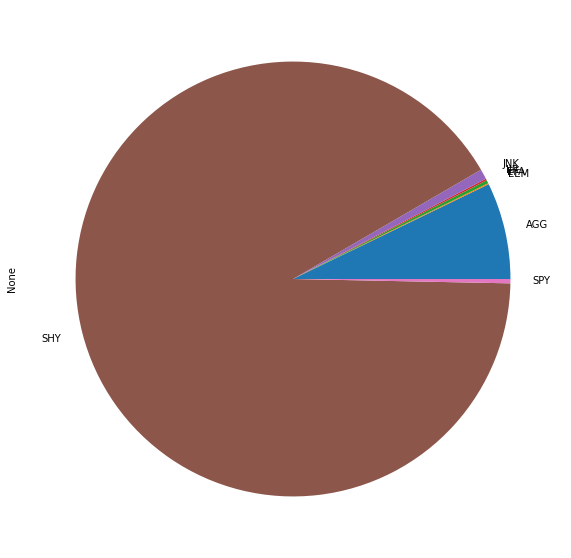

In [6]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [7]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 2.3%
Annual volatility: 1.4%
Sharpe Ratio: 0.19


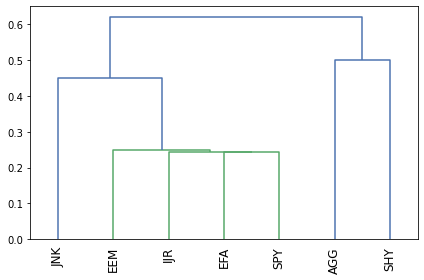

In [8]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);